# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
# !pip install Cython
!pip install Ripser

In [ ]:
import yfinance as yf
import numpy as np

from ripser import Rips
import persim

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Get data

In [ ]:
# define index names: ^GSPC = S&P 500, ^DJI = DOW Jones, ^IXIC=NASDAQ, ^RUT = Russell 2000
index_names = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# define date range
start_date_string = "2018-01-01"
end_date_string = "2022-04-21"

In [ ]:
# pull data from yahoo finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
raw_data.shape

(1083, 24)

In [ ]:
# keep only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

In [ ]:
# define array of adjusted closing prices
P = df_close.to_numpy()
# define array of log-returns defined as the log of the ratio between closing values of two subsequent days
r = np.log(np.divide(P[1:],P[:len(P)-1]))

In [ ]:
r.shape

(1082, 4)

# load sae features

In [ ]:
import pickle

In [ ]:
fn = 'ts-1L-21M_Wdec'
# fn = 'ts-2L-33M_Wdec'
file_path = f'/content/drive/MyDrive/{fn}.pkl'
with open(file_path, 'rb') as f:
    feature_weights = pickle.load(f)

In [ ]:
data = feature_weights.detach().cpu().numpy()
data.shape

(16384, 1024)

### Persistent homology

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


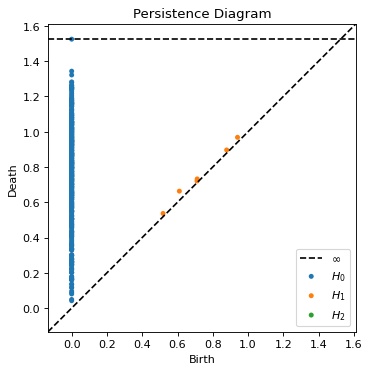

In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

dgm = rips.fit_transform(data[0:500, :])

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm, title="Persistence Diagram")

plt.savefig("homology_example_persistence-diagram.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

dgm = rips.fit_transform(data)

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm, title="Persistence Diagram")

plt.savefig("homology_example_persistence-diagram.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

# some parameters
w = 20 # time window size
n = len(raw_data)-(2*w)+1 # number of time segments
wasserstein_dists = np.zeros((n,1)) # initialize array for wasserstein distances

# compute wasserstein distances between persistence diagrams for subsequent time windows
for i in range(n):

    # Compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])

    # Compute wasserstein distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


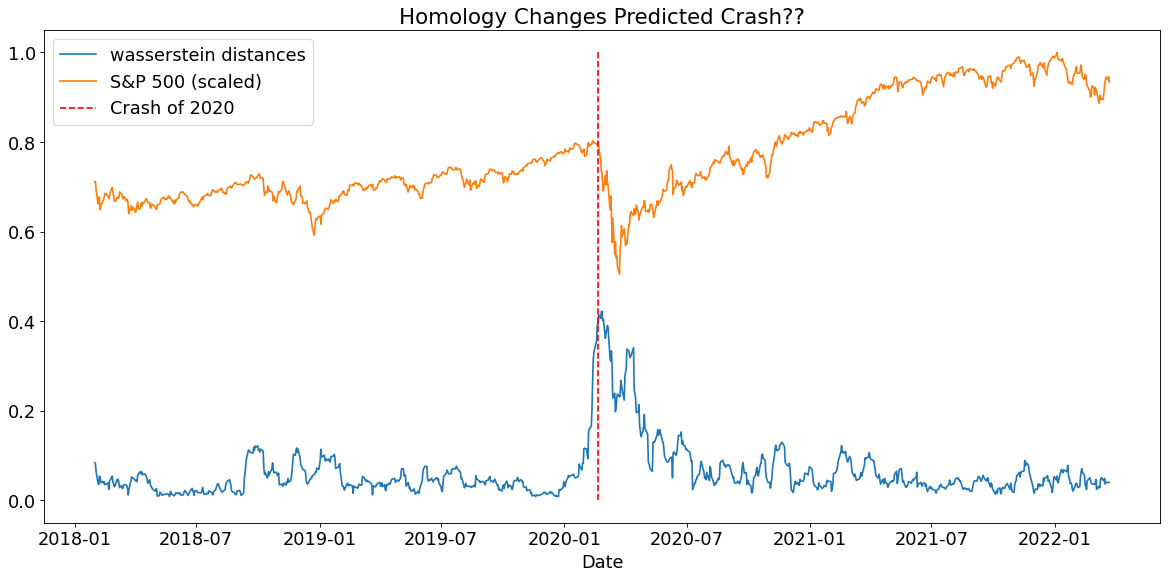

In [ ]:
# plot wasserstein distances over time
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[w:n+w],wasserstein_dists)
plt.plot(raw_data.index[w:n+w],df_close.iloc[w:n+w,0]/max(df_close.iloc[w:n+w,0]))
plt.plot([raw_data.index[536], raw_data.index[536]], [0, 1], 'r--')
plt.legend(['wasserstein distances', 'S&P 500 (scaled)', 'Crash of 2020'])
plt.xlabel('Date')
plt.title('Homology Changes Predicted Crash??')

plt.savefig("homology_example_Homology-Changes-Predicted-Crash??.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

# load sae f actvs

In [ ]:
file_path = '/content/drive/MyDrive/fActs_ts_1L_21M_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_A = pickle.load(f)

In [ ]:
file_path = '/content/drive/MyDrive/fActs_ts_2L_33M_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_B = pickle.load(f)

In [ ]:
feature_acts_model_B.shape

torch.Size([500, 128, 16384])

In [ ]:
first_dim_reshaped = feature_acts_model_A.shape[0] * feature_acts_model_A.shape[1]
reshaped_activations_A = feature_acts_model_A.reshape(first_dim_reshaped, feature_acts_model_A.shape[-1]).cpu()
# reshaped_activations_B = feature_acts_model_B.reshape(first_dim_reshaped, feature_acts_model_B.shape[-1]).cpu()

In [ ]:
reshaped_activations_B.shape

torch.Size([64000, 16384])

### Persistent homology

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


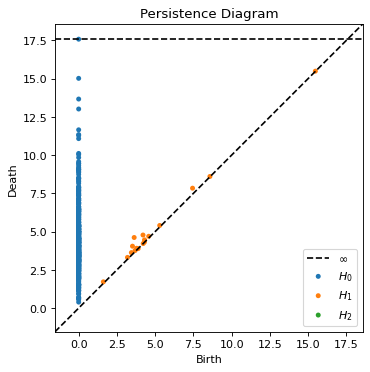

In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

dgm = rips.fit_transform(reshaped_activations_A[0:500, :])

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm, title="Persistence Diagram")

plt.savefig("homology_example_persistence-diagram.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


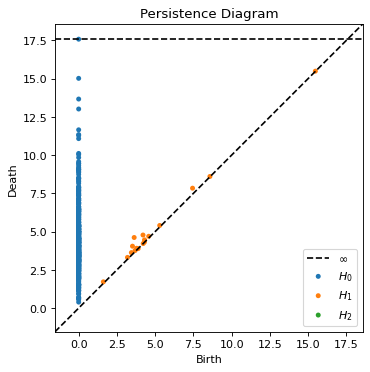

In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

dgm = rips.fit_transform(reshaped_activations_A[0:500, :])

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm, title="Persistence Diagram")

plt.savefig("homology_example_persistence-diagram.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

In [ ]:
raw_data = reshaped_activations_A[0:500, :]

In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

# some parameters
w = 20 # time window size
n = len(raw_data)-(2*w)+1 # number of time segments
wasserstein_dists = np.zeros((n,1)) # initialize array for wasserstein distances

# compute wasserstein distances between persistence diagrams for subsequent time windows
for i in range(n):

    # Compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])

    # Compute wasserstein distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [ ]:
# plot wasserstein distances over time
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[w:n+w],wasserstein_dists)
plt.plot(raw_data.index[w:n+w],df_close.iloc[w:n+w,0]/max(df_close.iloc[w:n+w,0]))
plt.plot([raw_data.index[536], raw_data.index[536]], [0, 1], 'r--')
plt.legend(['wasserstein distances', 'S&P 500 (scaled)', 'Crash of 2020'])
plt.xlabel('Date')
plt.title('Homology Changes Predicted Crash??')

plt.savefig("homology_example_Homology-Changes-Predicted-Crash??.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='white', edgecolor='auto')

AttributeError: 'Tensor' object has no attribute 'index'

<Figure size 1440x640 with 0 Axes>